In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import pdb
import os
import matplotlib.pyplot as plt

import scipy.stats

In [2]:
def bucket_fare_dist(fare_dist_input_path, fare_dist_output_path, num_clusters_fare, num_clusters_distance):
    df = pd.read_pickle(fare_dist_input_path)
    
    kmeans_fare = KMeans(n_clusters=num_clusters_fare, n_jobs=-1).fit(df['fare_amount'].values.reshape(-1, 1))
    centroids_fare = kmeans_fare.cluster_centers_
    bucketed_fare = kmeans_fare.labels_ 
    
    kmeans_distance = KMeans(n_clusters=num_clusters_distance, n_jobs=-1).fit(df['trip_distance'].values.reshape(-1, 1))
    centroids_distance = kmeans_distance.cluster_centers_
    bucketed_distance = kmeans_distance.labels_
    
    # Add new columns to dataframe 
    df = df.assign(bucketed_fare=pd.Series(bucketed_fare, index=df.index))
    df = df.assign(bucketed_distance=pd.Series(bucketed_distance, index=df.index))
    
    df.to_pickle(fare_dist_output_path)

def bucket_activity(activity_input_path, activity_output_path, num_clusters_activity):
    df = pd.read_pickle(activity_input_path)
    kmeans_activity = KMeans(n_clusters=num_clusters_activity, n_jobs=-1).fit(df[0].values.reshape(-1, 1))
    centroids_activity = kmeans_activity.cluster_centers_
    bucketed_activity = kmeans_activity.labels_ 
    
    # Add new columns to dataframe 
    df = df.assign(bucketed_activity=pd.Series(bucketed_activity, index=df.index))
    
    df.to_pickle(activity_output_path)

fare_dist_input_path = '/home/lashi/assets/clean-data/merged_141516.pickle'
fare_dist_output_path = '/home/lashi/assets/clean-data/merged_bucketed_141516.pickle'
activity_input_path = '/home/lashi/assets/clean-data/activity_141516.pickle'
activity_output_path = '/home/lashi/assets/clean-data/activity_bucketed_141516.pickle'

num_clusters_activity = 10
num_clusters_fare = 10
num_clusters_distance = 10

# bucket_fare_dist(fare_dist_input_path, fare_dist_output_path, num_clusters_fare, num_clusters_distance)
# bucket_activity(activity_input_path, activity_output_path, num_clusters_activity)

In [3]:
df_fare = pd.read_pickle(fare_dist_output_path)
df_activity = pd.read_pickle(activity_input_path)

DescribeResult(nobs=7052, minmax=(60.34, 450.01), mean=72.89968094157686, variance=510.0630989337851, skewness=9.481529312293397, kurtosis=124.47727664545583)

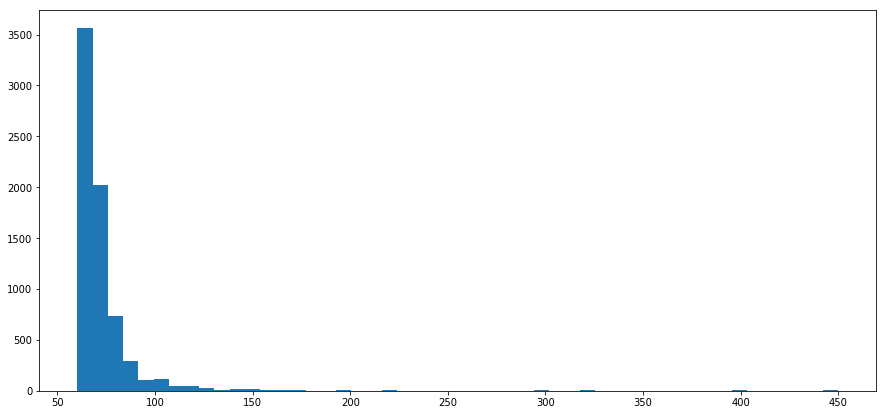

In [4]:
fares = df_fare.fare_amount

current_fares_interst = fares[(fares > 60) & (fares < 500)]
plt.figure(figsize=(15,7))
plt.hist(current_fares_interst, bins=50)
scipy.stats.describe(current_fares_interst)

# Let's make some bins using the above plot...

### Bucket 1 [Fares under 0 dollars]
### Bucket 2 [Fares under 5 dollars]
### Bucket 3 [Fares between 5 and 10 dollars]
### Bucket 4 [Fares between 10 and 15 dollars]
### Bucket 5 [Fares between 15 and 25 dollars]
### Bucket 6 [Fares between 25 and 50 dollars]
### Bucket 7 [Fares between 50 and 60 dollars]
### Bucket 8 [Fares above 60 dollars]

   cluster_id  day_of_week  t_bucket  0
0           0            0        16  1
1           0            0        21  1
2           0            0        25  1
3           0            0        26  1
4           0            0        27  2


DescribeResult(nobs=28106, minmax=(26, 49), mean=34.807123034227565, variance=43.1013490115121, skewness=0.48423989576094384, kurtosis=-0.8681298692188615)

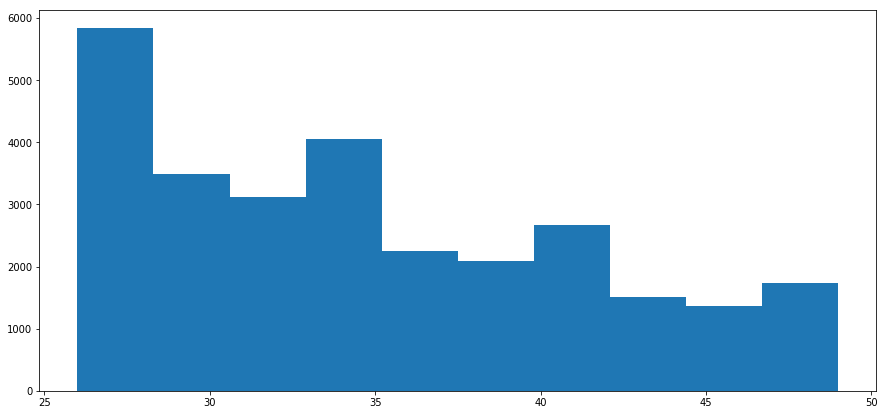

In [36]:
print(df_activity.head())

clusters = df_activity[0]
clusters_interst = clusters[(clusters > 25) & (clusters < 50)]

plt.figure(figsize=(15,7))
plt.hist(clusters_interst, bins=10)
scipy.stats.describe(clusters_interst)

# Let's make some bins using the above activity plots...

### Bucket 1 [activity between 0 and 5 trips]
### Bucket 2 [activity between 5 and 10 trips]
### Bucket 3 [activity between 10 and 20 trips]
### Bucket 4 [activity above 20 trips]

DescribeResult(nobs=528647, minmax=(4.01, 19.99), mean=8.368695575686612, variance=17.77419277379396, skewness=1.1398067788551565, kurtosis=0.29038701893555485)

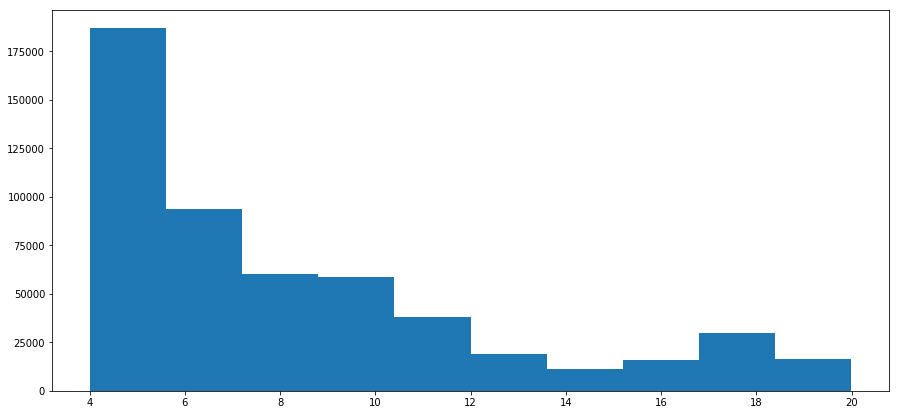

In [25]:
# print(df_fare.head())

clusters = df_fare.trip_distance
# print(clusters)
clusters_interst = clusters[(clusters > 4) & (clusters < 20)]
plt.figure(figsize=(15,7))
plt.hist(clusters_interst, bins=10)
scipy.stats.describe(clusters_interst)

### Buckets for Trip Distance

### Bucket 1 [0 to 0.5]
### Bucket 2 [0.5 to 1]
### Bucket 3 [1.0 to 1.5]
### Bucket 4 [1.5 to 2.0]
### Bucket 5 [2.0 to 3.0]
### Bucket 6 [3.0 to 5.0]
### Bucket 7 [5.0 to 10.0]
### Bucket 8 [>10.0]